<a href="https://colab.research.google.com/github/Sagan01/WDUM/blob/main/FilipSaganowski_ProjektWDUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt WDUM - Klasyfikacja gwiazd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

df= pd.read_csv("/star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [ ]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [ ]:
a, b, c = df["class"].value_counts() / len(df)
print(f"Galaktyki : {round(a*100, 1)}%")
print(f"Gwiazdy : {round(b*100, 1)}%")
print(f"Kwazary : {round(c*100, 1)}%")

Galaktyki : 59.4%
Gwiazdy : 21.6%
Kwazary : 19.0%


In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


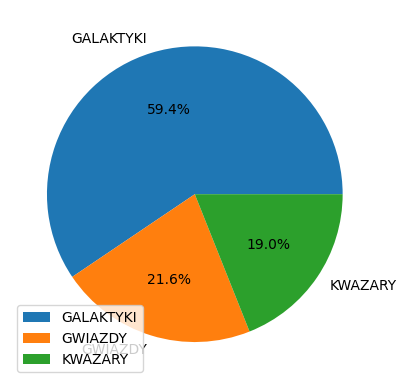

In [ ]:
plt.pie(df['class'].value_counts(),autopct="%1.1f%%",labels=['GALAKTYKI','GWIAZDY','KWAZARY'])
plt.legend();

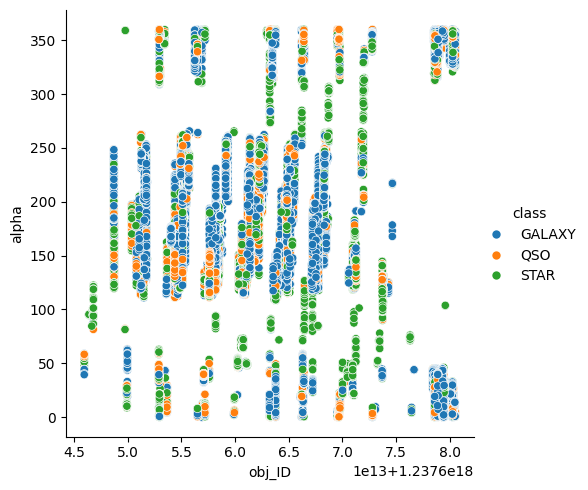

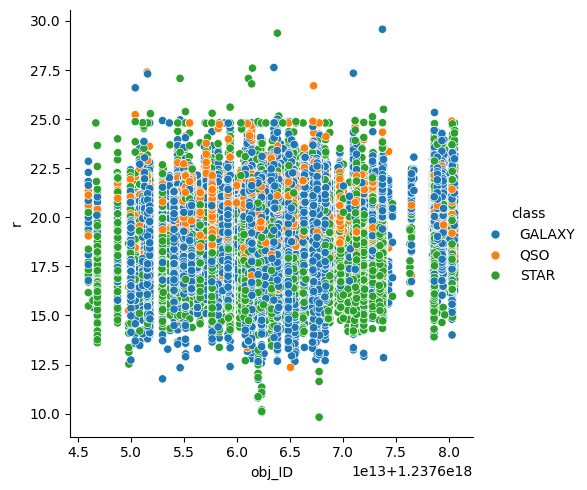

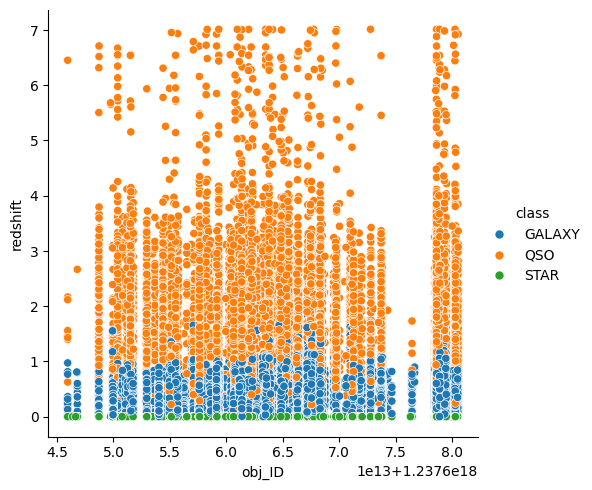

In [ ]:
plots=[]
for i in ['alpha', 'r', 'redshift']:
    g=sns.relplot(data=df,x='obj_ID', y=i, hue='class')
    plots.append(g);

<ipython-input-10-e3955924bc81>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop('rerun_ID', axis=1).corr(), annot=True,)


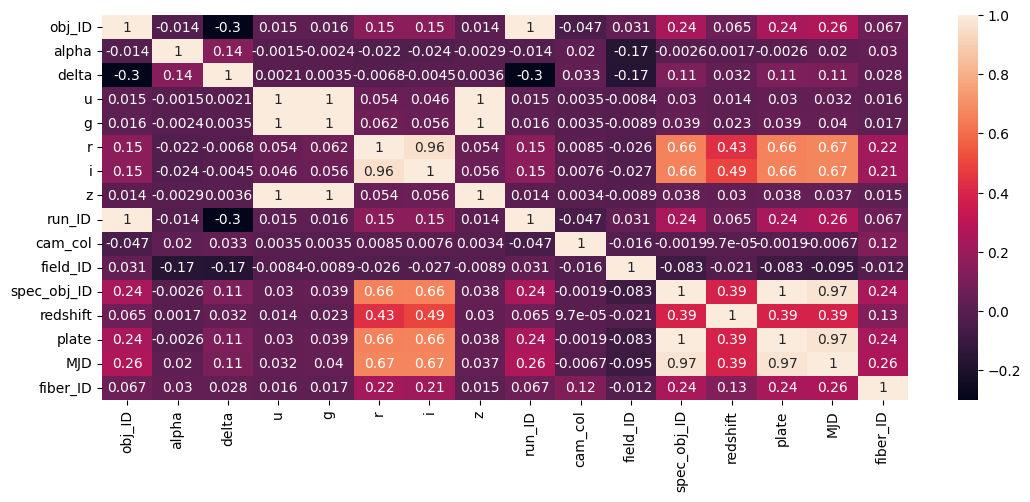

In [ ]:
plt.figure(figsize=(13,5))
sns.heatmap(df.drop('rerun_ID', axis=1).corr(), annot=True,)
plt.show()

In [ ]:
galaxy = df[df['class']=='GALAXY']
star = df[df['class']=='STAR']
qso = df[df['class']=='QSO']

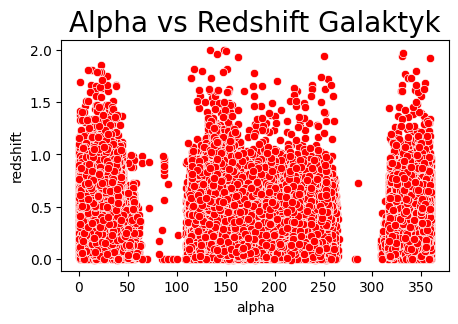

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='alpha',y='redshift',data=galaxy,color='r');
plt.title("Alpha vs Redshift Galaktyk",{'fontsize':20});

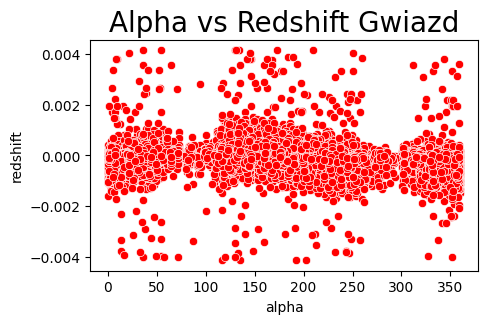

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='alpha',y='redshift',data=star,color='r');
plt.title("Alpha vs Redshift Gwiazd",{'fontsize':20});

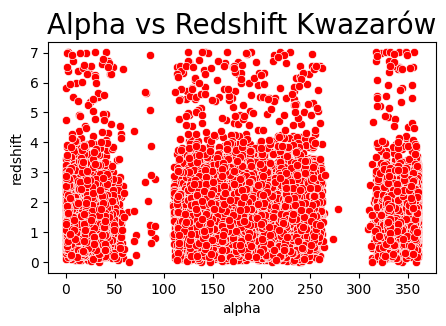

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='alpha',y='redshift',data=qso,color='r');
plt.title("Alpha vs Redshift Kwazarów",{'fontsize':20});

In [ ]:
X = df.drop(["class"],axis=1)
y = df["class"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test  = scalar.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(f"Dokładność : ",(accuracy_score(preds, y_test))*100,"%")

Dokładność :  90.125 %


In [ ]:
from sklearn.metrics import classification_report
print(f"Classification Report for :")
print(classification_report(y_test,preds))

Classification Report for :
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     11860
           1       0.96      0.82      0.89      3797
           2       0.90      0.81      0.85      4343

    accuracy                           0.90     20000
   macro avg       0.92      0.86      0.89     20000
weighted avg       0.90      0.90      0.90     20000



In [ ]:
for i in range(1,9):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Neighbors:", i, "Accuracy score:", (accuracy_score(preds, y_test))*100)

Neighbors: 1 Accuracy score: 89.32
Neighbors: 2 Accuracy score: 88.02
Neighbors: 3 Accuracy score: 90.125
Neighbors: 4 Accuracy score: 89.03999999999999
Neighbors: 5 Accuracy score: 89.92999999999999
Neighbors: 6 Accuracy score: 88.94999999999999
Neighbors: 7 Accuracy score: 89.47
Neighbors: 8 Accuracy score: 88.69500000000001


In [ ]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC()
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

print("Dokładność SVM :", accuracy_score(y_test, y_pred))

Dokładność SVM : 0.93625


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
y_pred1 = lr_model.predict(X_test)
print("Dokładność LR :", accuracy_score(y_test, y_pred1))

Dokładność LR : 0.95485


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_res = encoder.fit_transform(y_res)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test  = scalar.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(f"Dokładność : ",(accuracy_score(preds, y_test))*100,"%")

from sklearn.svm import LinearSVC

svm_classifier = LinearSVC()
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

print("Dokładność SVM :", accuracy_score(y_test, y_pred))

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
y_pred1 = lr_model.predict(X_test)
print("Dokładność LR :", accuracy_score(y_test, y_pred1))

Dokładność :  92.87857122830627 %


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Dokładność SVM : 0.9525051167746096
Dokładność LR : 0.9597667311520454


#Dokładność:

Dokładność KNN :  90.125 %

Dokładność SVM : 93.625 %

Dokładność LR : 95.485 %

#Dokładność z wyrównanymi danymi:

Dokładność KNN :  92.878 %

Dokładność SVM : 95.250 %

Dokładność LR : 95.976 %